In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Import and call helper functions

Helper functions that automate the joining of the appropriate dataframes.

In [2]:
# from revisionTesthelper_functions import *  #This is the function that seems to work with this notebook!
# from get_total_movie_info import *
from helper_functions import *

In [3]:
df = get_clean_df()

In [4]:
df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,year,runtime_minutes,genres,ordering,title,...,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,clean_domestic_gross,clean_worldwide_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,42.0,"Jan 10, 2014",70000000.0,18848538.0,58953319.0,NaN,NaN,NaN,18848538.0,58953319.0
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,38.0,"Sep 27, 2013",8500000.0,21569509.0,22885836.0,NaN,NaN,NaN,21569509.0,22885836.0
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,15.0,"Sep 23, 2011",50000000.0,75605492.0,111300835.0,NaN,NaN,NaN,75605492.0,111300835.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,61.0,"Oct 15, 2010",50000000.0,32746941.0,108660270.0,NaN,NaN,NaN,32746941.0,108660270.0
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",26,21jumpstreet,...,44.0,"Mar 16, 2012",42000000.0,138447667.0,202812429.0,NaN,NaN,NaN,138447667.0,202812429.0


In [5]:
df.columns

Index(['movie_id', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'year', 'runtime_minutes', 'genres', 'ordering',
       'title', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'id', 'release_date', 'production_budget',
       'domestic_gross_movie_budgets', 'worldwide_gross_movie_budgets',
       'studio', 'domestic_gross_movie_gross', 'foreign_gross_movie_gross',
       'clean_domestic_gross', 'clean_worldwide_gross'],
      dtype='object')

### Split and explode the genres column to sepperate movies that are listed with more than one genre.

In [6]:
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres').reset_index(drop=True)

### Describe the gross income column that will be used for analysis.

In [7]:
df['clean_domestic_gross'].describe()

count    3.394000e+03
mean     5.015310e+07
std      8.251116e+07
min      0.000000e+00
25%      1.400000e+06
50%      2.159644e+07
75%      6.143353e+07
max      9.367000e+08
Name: clean_domestic_gross, dtype: float64

### Optional: Normalized the gross column as a new dataframe

In [8]:
normalized_df = df['Norm_clean_domestic_gross']=(df['clean_domestic_gross']-df['clean_domestic_gross'].mean())/df['clean_domestic_gross'].std()

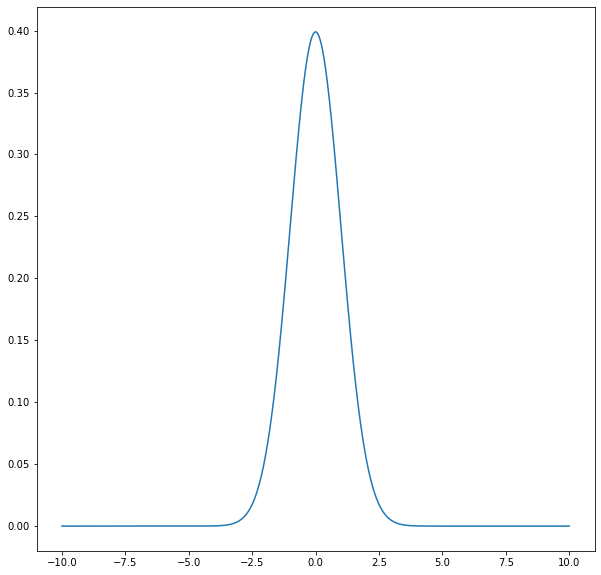

In [9]:
import pylab
# from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
mean = normalized_df.mean()
std = normalized_df.std(ddof=1)
x = np.linspace(-10,10,1000)
y = norm.pdf(x, loc=mean, scale=std)    # for example
pylab.plot(x,y)
pylab.show()

In [10]:
normalized_df

0      -0.379398
1      -0.379398
2      -0.379398
3      -0.346421
4       0.308472
          ...   
3389   -0.537541
3390   -0.537541
3391   -0.607117
3392   -0.525421
3393   -0.525421
Name: clean_domestic_gross, Length: 3394, dtype: float64

In [11]:
# stats.ttest_ind(df['clean_domestic_gross'])

### Using the clean dataframe to find top performing genre by domestic gross income

In [12]:
df

,movie_id,averagerating,numvotes,primary_title,original_title,year,runtime_minutes,genres,ordering,title,...,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,clean_domestic_gross,clean_worldwide_gross,Norm_clean_domestic_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Action,20,thelegendofhercules,...,"Jan 10, 2014",70000000.0,18848538.0,58953319.0,NaN,NaN,NaN,18848538.0,58953319.0,-0.379398
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Adventure,20,thelegendofhercules,...,"Jan 10, 2014",70000000.0,18848538.0,58953319.0,NaN,NaN,NaN,18848538.0,58953319.0,-0.379398
2,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Fantasy,20,thelegendofhercules,...,"Jan 10, 2014",70000000.0,18848538.0,58953319.0,NaN,NaN,NaN,18848538.0,58953319.0,-0.379398
3,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,"Sep 27, 2013",8500000.0,21569509.0,22885836.0,NaN,NaN,NaN,21569509.0,22885836.0,-0.346421
4,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,Biography,14,moneyball,...,"Sep 23, 2011",50000000.0,75605492.0,111300835.0,NaN,NaN,NaN,75605492.0,111300835.0,0.308472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,tt2132285,5.6,77726,The Bling Ring,The Bling Ring,2013,90.0,Crime,1,theblingring,...,NaN,NaN,NaN,NaN,A24,5800000.0,13300000.0,5800000.0,5800000.0,-0.537541
3390,tt2132285,5.6,77726,The Bling Ring,The Bling Ring,2013,90.0,Drama,1,theblingring,...,NaN,NaN,NaN,NaN,A24,5800000.0,13300000.0,5800000.0,5800000.0,-0.537541
3391,tt2463288,6.0,48134,Walk of Shame,Walk of Shame,2014,95.0,Comedy,12,walkofshame,...,NaN,NaN,NaN,NaN,FCW,59200.0,NaN,59200.0,59200.0,-0.607117
3392,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,Biography,16,boyerased,...,NaN,NaN,NaN,NaN,Focus,6800000.0,5000000.0,6800000.0,6800000.0,-0.525421


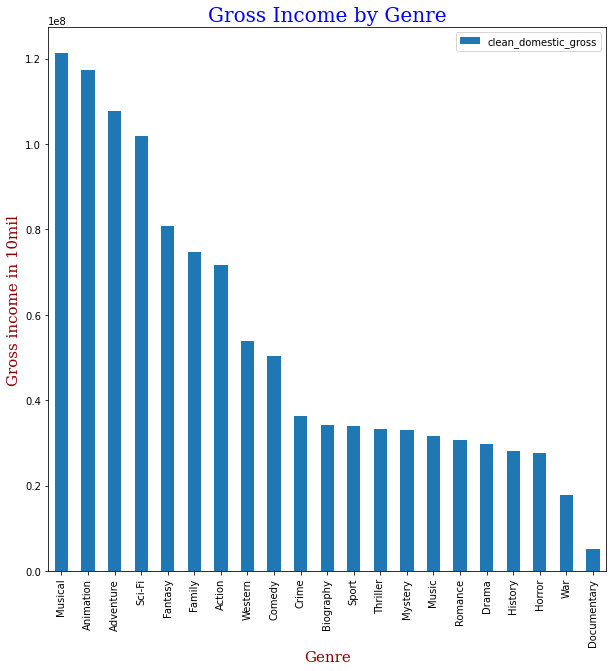

In [13]:
x = df.groupby('genres').mean()[['clean_domestic_gross']].sort_values('clean_domestic_gross', ascending = False)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
x.plot.bar()
plt.title("Gross Income by Genre", fontdict = font1)
plt.xlabel("Genre", fontdict = font2)
plt.ylabel("Gross income in 10mil", fontdict = font2)

plt.show()

In [14]:
x

,clean_domestic_gross
genres,
Musical,1.212466e+08
Animation,1.174243e+08
Adventure,1.076802e+08
Sci-Fi,1.019693e+08
Fantasy,8.079282e+07
Family,7.481686e+07
Action,7.158211e+07
Western,5.392671e+07
Comedy,5.040749e+07


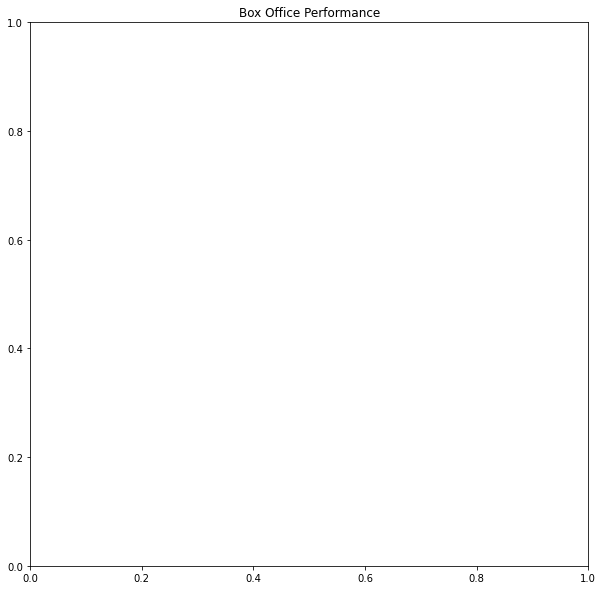

In [21]:
# view top genres
labels = x.index
data = x['clean_domestic_gross']
plt.title('Box Office Performance');

In [ ]:
adventures = df[df['genres']=="Adventure"]

actions = df[df['genres']=="Action"]



In [ ]:
adventures

In [ ]:
actions

In [ ]:
# alpha 0.05
# mean gross income is higher in action genre than adventure
stats.ttest_ind(actions['clean_domestic_gross'], adventures['clean_domestic_gross']).pvalue/2

In [ ]:
animations = df[df['genres']=="Animation"]

In [ ]:
musicals = df[df['genres']=="Music"]

In [ ]:
# alpha 0.05
# mean gross income is higher in Animation genre than adventure
stats.ttest_ind(animations['clean_domestic_gross'], adventures['clean_domestic_gross']).pvalue/2

In [ ]:
df['production_budget'].value_counts()

In [ ]:
df['clean_domestic_gross'].value_counts()

In [ ]:
df['profit'] = df['clean_domestic_gross'] - df['production_budget']

In [ ]:
df['profit'].head()

In [ ]:
x = df.groupby('genres').mean()[['profit']].sort_values('profit', ascending = False)
x.plot.bar()

In [ ]:
animations = df[df['genres']=="Animation"]

In [ ]:
musicals = df[df['genres'] == "Music"]

In [ ]:
# alpha 0.05
# mean gross income is higher in Animation genre than adventure
stats.ttest_ind(animations['profit'], musicals['profit']).pvalue/2